In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# URL for the dataset
url = "https://raw.githubusercontent.com/PythonMLDaily/Python-Linear-Regression-Course/main/data/salaries.csv"
column_names = ["years_of_experience", "salary"]
data = pd.read_csv(url, names = column_names)
data.head()

,years_of_experience,salary
0,years_of_experience,salary
1,5,3150
2,9,3787
3,4,2991
4,10,4551


In [4]:
# Ensure numeric types
data["years_of_experience"] = pd.to_numeric(data["years_of_experience"], errors= 'coerce')
data["salary"] = pd.to_numeric(data["salary"], errors="coerce")
#errors='coerce' parameter ensures that any values that cannot be converted to numeric will be replaced with NaN
# Drop rows with NaN
data = data.dropna()

In [5]:
data.head()

,years_of_experience,salary
1,5.0,3150.0
2,9.0,3787.0
3,4.0,2991.0
4,10.0,4551.0
5,8.0,3540.0


In [6]:
X = data["years_of_experience"]
Y = data["salary"]

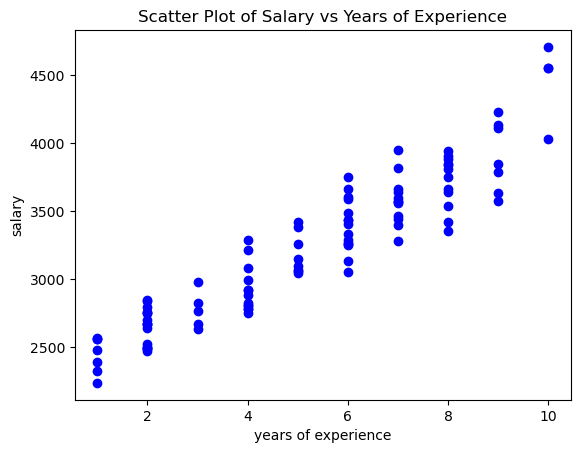

In [7]:
plt.scatter(X,Y, color="blue")
plt.title("Scatter Plot of Salary vs Years of Experience")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

In [8]:
X.shape

(100,)

In [9]:
# Ensure X is reshaped to 2D
X = data["years_of_experience"].values.reshape(-1, 1)

In [10]:
X.shape

(100, 1)

In [11]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

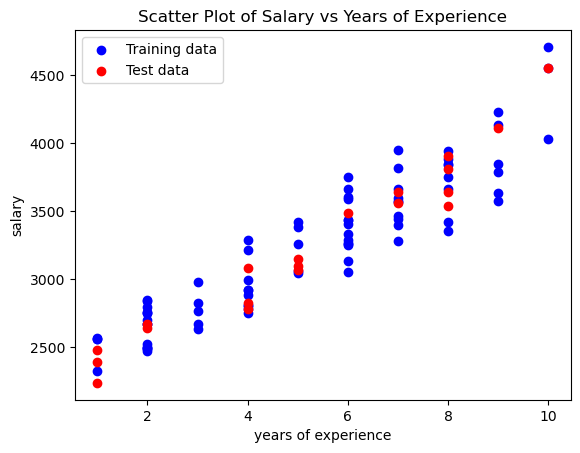

In [12]:
plt.scatter(X_train, Y_train, color='blue', label="Training data")
plt.scatter(X_test, Y_test, color='red', label="Test data")
plt.title("Scatter Plot of Salary vs Years of Experience")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.legend()
plt.show()

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80, 1)
(20, 1)
(80,)
(20,)


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
Y_pred =model.predict(X_test)
Y_pred

array([3384.17128921, 2435.75698164, 3004.80556618, 2625.43984315,
       4142.90273527, 3573.85415073, 3763.53701224, 2435.75698164,
       3004.80556618, 3194.4884277 , 3953.21987376, 3573.85415073,
       3194.4884277 , 3194.4884277 , 3004.80556618, 3763.53701224,
       3763.53701224, 2625.43984315, 2435.75698164, 3763.53701224])

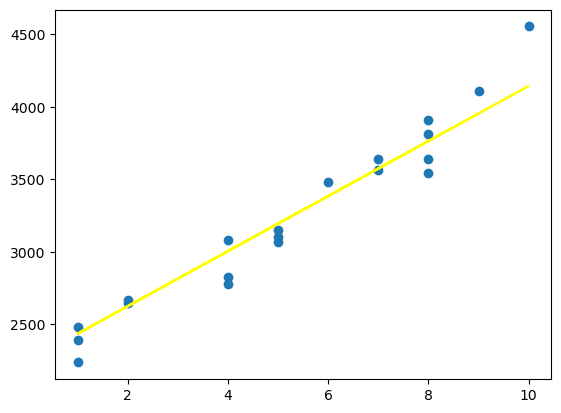

In [17]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color = 'yellow')

In [18]:
# Get the slope (m) and intercept (b)
slope = model.coef_[0]
intercept = model.intercept_

# Equation of the trend line
print(f"The trend line equation is: y = {slope:.2f}x + {intercept:.2f}")

The trend line equation is: y = 189.68x + 2246.07


In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
r2

0.9373858925288362

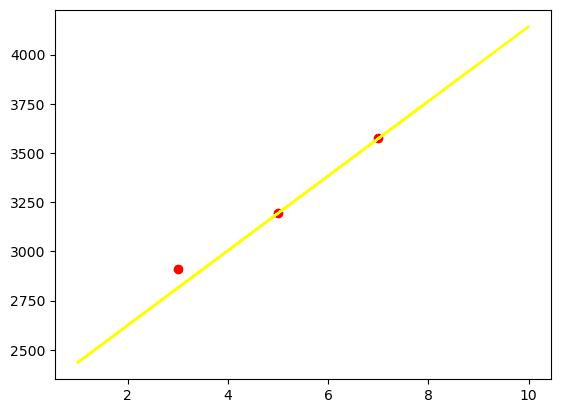

In [20]:
new_test = [[7], [5], [3]]
new_pred = model.predict([[7], [5], [3.5]])
plt.scatter(new_test, new_pred, color='red', label='Testing Data')
plt.plot(X_test, Y_pred, color = 'yellow')